In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("feat_25.csv")

In [3]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,class
0,1.977852,-0.346314,-0.570131,0.195685,-0.537241,0.126797,-0.274765,-1.103073,-1.278260,1.511290,...,-0.062213,-0.578102,-1.330746,-0.080511,0.859483,-0.270657,0.691702,-1.398070,1.174889,0
1,1.613268,0.222368,2.413506,-0.297182,-0.636701,1.581054,-0.016959,1.798778,1.045940,0.576654,...,0.124139,-0.095510,-0.703692,2.073224,0.806465,1.295816,1.041119,0.305158,-0.494254,0
2,2.488947,-0.155082,-0.977093,0.582125,-1.043786,-0.980330,1.193903,-0.953012,0.002710,0.289364,...,1.129174,-0.734398,-1.701867,0.146096,1.633311,0.210991,0.588574,0.043234,0.998827,0
3,1.606905,-1.352302,-1.413311,0.527138,-2.009455,-1.938931,0.002983,-0.616852,-1.219592,-0.797112,...,-0.222080,-0.310110,2.025611,-1.902873,-0.760754,1.043425,-2.082864,0.233015,-1.243373,0
4,0.566573,0.313999,0.132044,-1.281047,0.191348,0.922912,0.109798,1.494402,-0.856606,0.027243,...,-0.088047,-0.090599,-0.987043,1.001203,1.398321,-0.235463,-1.505669,1.464694,0.216427,0


In [4]:
df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       'class'],
      dtype='object')

In [5]:
df['class'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [6]:
x = np.array(df.drop('class',axis=1))
y = np.array(df['class'])

C:\Users\B P Patel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

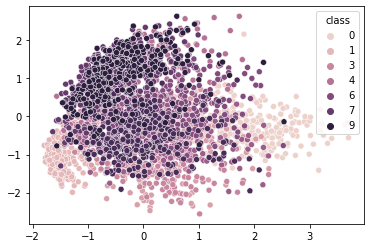

In [7]:
sns.scatterplot(np.array(df['1']),np.array(df['2']),data = df, hue = df['class'])
# plt.xlabel('df["1"]')

C:\Users\B P Patel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


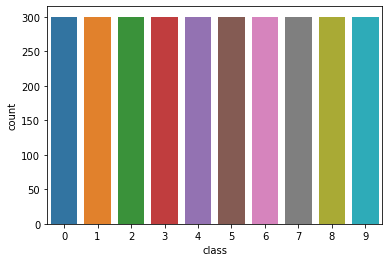

In [8]:
sns.countplot('class',data=df)
plt.show()

<AxesSubplot:>

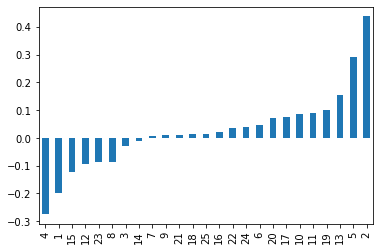

In [9]:
df.corr()['class'][:-1].sort_values().plot(kind='bar')

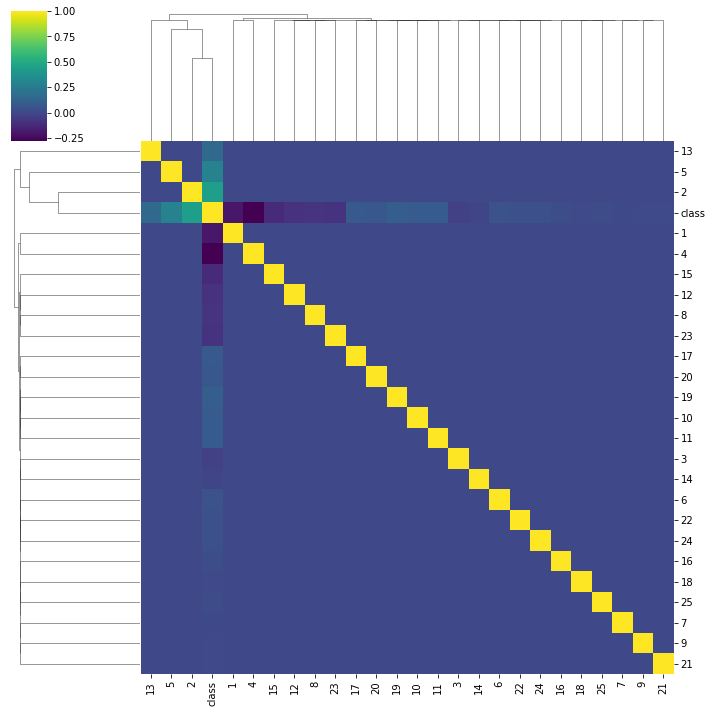

In [10]:
sns.clustermap(df.corr(),cmap='viridis')

<AxesSubplot:>

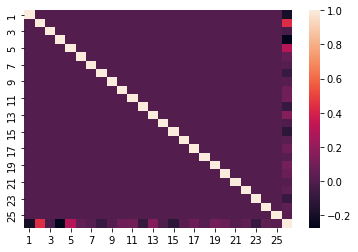

In [40]:
sns.heatmap(df.corr())

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=101,test_size=0.2)

In [17]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [19]:
cross_val = StratifiedKFold(n_splits = 6)
svc = SVC()
param_grid = {'C':[0.001,0.01,0.1,0.5,0.8,1,5,10,50],'kernel':['rbf','poly','sigmoid','linear'],'gamma': ['scale','auto',0.001,0.01, 0.1,0.3,0.5,0.7,0.9,1], 'degree':np.arange(1,10)}
grid = GridSearchCV(svc,param_grid,cv =cross_val)
grid.fit(scaled_x_train,y_train.ravel())
grid_pred = grid.predict(scaled_x_test)
print(f'Best Parameters = {grid.best_params_}, Best score = {grid.best_score_}')

Best Parameters = {'C': 10, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}, Best score = 0.9525000000000001


In [33]:
cross_val = StratifiedKFold(n_splits =6)
svc = SVC()
param_grid = {'C':[10],'kernel':['rbf'],'gamma': ['scale'], 'degree':[1]}
grid = GridSearchCV(svc,param_grid,cv =cross_val)
grid.fit(scaled_x_train,y_train.ravel())
grid_pred = grid.predict(scaled_x_test)
acc = grid.score(scaled_x_test,np.array(y_test).reshape(-1,1))
print(f'Validation score = {grid.best_score_}, Test score = {acc}')
print('\n')
print('Confusion matrix')
print(confusion_matrix(y_test,grid_pred))
print('\n')
print('Classification report')
print(classification_report(y_test,grid_pred))

Validation score = 0.9525000000000001, Test score = 0.9466666666666667


Confusion matrix
[[70  0  0  0  0  0  1  0  0  0]
 [ 0 63  0  0  0  0  0  0  1  0]
 [ 0  0 47  1  1  0  0  1  1  0]
 [ 0  0  1 62  0  1  0  1  0  0]
 [ 0  0  2  1 62  0  0  0  0  0]
 [ 0  0  0  2  1 52  1  0  1  1]
 [ 0  0  0  0  0  0 54  0  0  0]
 [ 0  1  1  0  1  0  0 53  0  1]
 [ 0  0  0  1  0  1  1  1 53  0]
 [ 0  0  0  1  1  0  0  3  1 52]]


Classification report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       0.98      0.98      0.98        64
           2       0.92      0.92      0.92        51
           3       0.91      0.95      0.93        65
           4       0.94      0.95      0.95        65
           5       0.96      0.90      0.93        58
           6       0.95      1.00      0.97        54
           7       0.90      0.93      0.91        57
           8       0.93      0.93      0.93        57
           9  

### ***RBF Kernel***

Kernel = RBF, C = 0.1, gamma = scale, Validation score = 0.95125, Test score = 0.9466666666666667
Kernel = RBF, C = 0.1, gamma = auto, Validation score = 0.95125, Test score = 0.9466666666666667
Kernel = RBF, C = 0.1, gamma = 0.1, Validation score = 0.9508333333333333, Test score = 0.945
Kernel = RBF, C = 0.1, gamma = 0.3, Validation score = 0.775, Test score = 0.77
Kernel = RBF, C = 0.1, gamma = 0.5, Validation score = 0.49499999999999994, Test score = 0.5116666666666667
Kernel = RBF, C = 0.1, gamma = 0.7, Validation score = 0.34583333333333327, Test score = 0.3416666666666667
Kernel = RBF, C = 0.1, gamma = 0.9, Validation score = 0.26833333333333337, Test score = 0.24166666666666667
Kernel = RBF, C = 0.1, gamma = 1, Validation score = 0.23833333333333337, Test score = 0.22
Kernel = RBF, C = 0.5, gamma = scale, Validation score = 0.95125, Test score = 0.9466666666666667
Kernel = RBF, C = 0.5, gamma = auto, Validation score = 0.95125, Test score = 0.9466666666666667
Kernel = RBF, C = 0

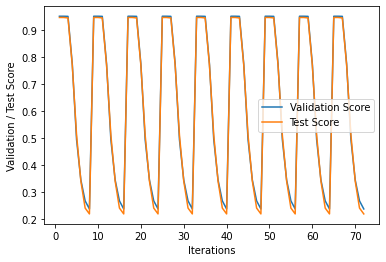

In [44]:
cross_val = StratifiedKFold(n_splits = 6)
svc = SVC()
C =[0.1,0.5,0.8,1,5,7,9,10,50]
gamma_ = ['scale','auto', 0.1,0.3,0.5,0.7,0.9,1]
val_score,test_score,iter_ =[],[],[]
count=0

for i in C:
    for k in gamma_:
        param_grid = {'kernel':['rbf'],'C':[j],'gamma': [k], 'degree':[l]}
        grid = GridSearchCV(svc,param_grid,cv =cross_val)
        grid.fit(scaled_x_train,y_train.ravel())
        grid_pred = grid.predict(scaled_x_test)
        acc = grid.score(scaled_x_test,np.array(y_test).reshape(-1,1))
        val_score.append(grid.best_score_)
        test_score.append(acc)
        count+=1
        iter_.append(count)
        print(f'Kernel = RBF, C = {i}, gamma = {k}, Validation score = {grid.best_score_}, Test score = {acc}')
                

plt.plot(iter_,val_score)
plt.plot(iter_,test_score)
plt.xlabel("Iterations")
plt.ylabel("Validation / Test Score")
plt.legend(['Validation Score','Test Score'])
plt.show()

### ***POLY Kernel***

Kernel = POLY, C = 0.001, degree=1, Validation score = 0.10375000000000001, Test score = 0.085
Kernel = POLY, C = 0.001, degree=2, Validation score = 0.10375000000000001, Test score = 0.085
Kernel = POLY, C = 0.001, degree=3, Validation score = 0.10375000000000001, Test score = 0.085
Kernel = POLY, C = 0.001, degree=4, Validation score = 0.10375000000000001, Test score = 0.085
Kernel = POLY, C = 0.001, degree=5, Validation score = 0.10375000000000001, Test score = 0.085
Kernel = POLY, C = 0.001, degree=6, Validation score = 0.10375000000000001, Test score = 0.085
Kernel = POLY, C = 0.001, degree=7, Validation score = 0.10416666666666667, Test score = 0.085
Kernel = POLY, C = 0.001, degree=8, Validation score = 0.10416666666666667, Test score = 0.085
Kernel = POLY, C = 0.001, degree=9, Validation score = 0.10458333333333335, Test score = 0.085
Kernel = POLY, C = 0.01, degree=1, Validation score = 0.5304166666666666, Test score = 0.65
Kernel = POLY, C = 0.01, degree=2, Validation score =

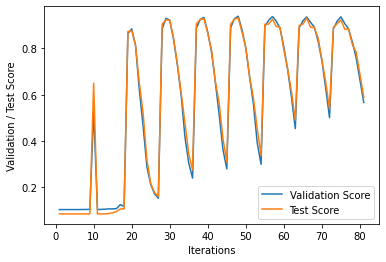

In [39]:
cross_val = StratifiedKFold(n_splits = 6)
svc = SVC()
C =[0.001,0.01,0.1,0.5,0.8,1,5,10,50]
d = np.arange(1,10)
val_score,test_score,iter_ =[],[],[]
count=0
for j in C:
    for l in d:
        param_grid = {'kernel':['poly'],'C':[j],'degree':[l]}
        grid = GridSearchCV(svc,param_grid,cv =cross_val)
        grid.fit(scaled_x_train,y_train.ravel())
        grid_pred = grid.predict(scaled_x_test)
        acc = grid.score(scaled_x_test,np.array(y_test).reshape(-1,1))
        val_score.append(grid.best_score_)
        test_score.append(acc)
        count+=1
        iter_.append(count)
        print(f'Kernel = POLY, C = {j}, degree={l}, Validation score = {grid.best_score_}, Test score = {acc}')
                

plt.plot(iter_,val_score)
plt.plot(iter_,test_score)
plt.xlabel("Iterations")
plt.ylabel("Validation / Test Score")
plt.legend(['Validation Score','Test Score'])
plt.show()

### ***SIGMOID Kernel***

Kernel = SIGMOID, C = 0.001, gamma = scale, Validation score = 0.10375000000000001, Test score = 0.085
Kernel = SIGMOID, C = 0.001, gamma = auto, Validation score = 0.10375000000000001, Test score = 0.085
Kernel = SIGMOID, C = 0.001, gamma = 0.001, Validation score = 0.10375000000000001, Test score = 0.085
Kernel = SIGMOID, C = 0.001, gamma = 0.01, Validation score = 0.10375000000000001, Test score = 0.085
Kernel = SIGMOID, C = 0.001, gamma = 0.1, Validation score = 0.10375000000000001, Test score = 0.085
Kernel = SIGMOID, C = 0.001, gamma = 0.3, Validation score = 0.10375000000000001, Test score = 0.085
Kernel = SIGMOID, C = 0.001, gamma = 0.5, Validation score = 0.10375000000000001, Test score = 0.085
Kernel = SIGMOID, C = 0.001, gamma = 0.7, Validation score = 0.10375000000000001, Test score = 0.085
Kernel = SIGMOID, C = 0.001, gamma = 0.9, Validation score = 0.10375000000000001, Test score = 0.085
Kernel = SIGMOID, C = 0.001, gamma = 1, Validation score = 0.10375000000000001, Test 

Kernel = SIGMOID, C = 50, gamma = scale, Validation score = 0.7495833333333334, Test score = 0.7716666666666666
Kernel = SIGMOID, C = 50, gamma = auto, Validation score = 0.7483333333333334, Test score = 0.7716666666666666
Kernel = SIGMOID, C = 50, gamma = 0.001, Validation score = 0.89125, Test score = 0.9066666666666666
Kernel = SIGMOID, C = 50, gamma = 0.01, Validation score = 0.8812500000000001, Test score = 0.875
Kernel = SIGMOID, C = 50, gamma = 0.1, Validation score = 0.5604166666666667, Test score = 0.56
Kernel = SIGMOID, C = 50, gamma = 0.3, Validation score = 0.3633333333333333, Test score = 0.365
Kernel = SIGMOID, C = 50, gamma = 0.5, Validation score = 0.33166666666666667, Test score = 0.3383333333333333
Kernel = SIGMOID, C = 50, gamma = 0.7, Validation score = 0.30666666666666664, Test score = 0.32
Kernel = SIGMOID, C = 50, gamma = 0.9, Validation score = 0.30624999999999997, Test score = 0.31833333333333336
Kernel = SIGMOID, C = 50, gamma = 1, Validation score = 0.3008333

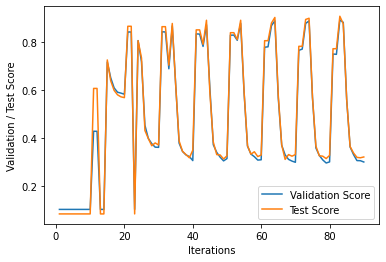

In [42]:
cross_val = StratifiedKFold(n_splits = 6)
svc = SVC()
C =[0.001,0.01,0.1,0.5,0.8,1,5,10,50]
gamma_ = ['scale','auto',0.001,0.01, 0.1,0.3,0.5,0.7,0.9,1]
val_score,test_score,iter_ =[],[],[]
count=0

for j in C:
    for k in gamma_:
        param_grid = {'kernel':['sigmoid'],'C':[j],'gamma': [k]}
        grid = GridSearchCV(svc,param_grid,cv =cross_val)
        grid.fit(scaled_x_train,y_train.ravel())
        grid_pred = grid.predict(scaled_x_test)
        acc = grid.score(scaled_x_test,np.array(y_test).reshape(-1,1))
        val_score.append(grid.best_score_)
        test_score.append(acc)
        count+=1
        iter_.append(count)
        print(f'Kernel = SIGMOID, C = {j}, gamma = {k}, Validation score = {grid.best_score_}, Test score = {acc}')


plt.plot(iter_,val_score)
plt.plot(iter_,test_score)
plt.xlabel("Iterations")
plt.ylabel("Validation / Test Score")
plt.legend(['Validation Score','Test Score'])
plt.show()

### ***Linear Kernel***

Kernel = LINEAR , C = 0.001, Validation score = 0.8066666666666666, Test score = 0.81
Kernel = LINEAR , C = 0.01, Validation score = 0.8766666666666666, Test score = 0.8933333333333333
Kernel = LINEAR , C = 0.1, Validation score = 0.8937500000000002, Test score = 0.9116666666666666
Kernel = LINEAR , C = 0.3, Validation score = 0.8904166666666667, Test score = 0.895
Kernel = LINEAR , C = 0.5, Validation score = 0.89, Test score = 0.9
Kernel = LINEAR , C = 0.8, Validation score = 0.8858333333333333, Test score = 0.8983333333333333
Kernel = LINEAR , C = 1, Validation score = 0.88625, Test score = 0.8933333333333333
Kernel = LINEAR , C = 5, Validation score = 0.8791666666666668, Test score = 0.88
Kernel = LINEAR , C = 8, Validation score = 0.8779166666666667, Test score = 0.8766666666666667
Kernel = LINEAR , C = 10, Validation score = 0.8741666666666665, Test score = 0.875
Kernel = LINEAR , C = 50, Validation score = 0.8695833333333334, Test score = 0.875
Kernel = LINEAR , C = 100, Validat

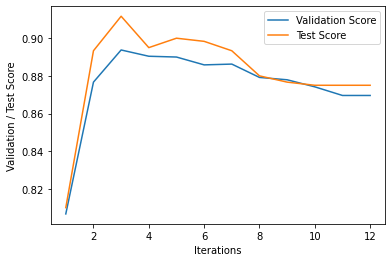

In [43]:
cross_val = StratifiedKFold(n_splits = 6)
svc = SVC()
C =[0.001,0.01,0.1,0.3,0.5,0.8,1,5,8,10,50,100]
val_score,test_score,iter_ =[],[],[]
count=0
for j in C:
    param_grid = {'kernel':['linear'],'C':[j]}
    grid = GridSearchCV(svc,param_grid,cv =cross_val)
    grid.fit(scaled_x_train,y_train.ravel())
    grid_pred = grid.predict(scaled_x_test)
    acc = grid.score(scaled_x_test,np.array(y_test).reshape(-1,1))
    val_score.append(grid.best_score_)
    test_score.append(acc)
    count+=1
    iter_.append(count)
    print(f'Kernel = LINEAR , C = {j}, Validation score = {grid.best_score_}, Test score = {acc}')
                

plt.plot(iter_,val_score)
plt.plot(iter_,test_score)
plt.xlabel("Iterations")
plt.ylabel("Validation / Test Score")
plt.legend(['Validation Score','Test Score'])
plt.show()